In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.python
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import os




Using TensorFlow backend.


In [2]:
# Prepare Testing Dataset

Test_dir = "Dataset/test1"
Test_size = len([name for name in os.listdir(Test_dir)])
print("Number of test images:", Test_size)

test_filenames = os.listdir(Test_dir)    
    
test_df = pd.DataFrame({
    'filename' : test_filenames   
})

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

test_generator = test_datagen.flow_from_dataframe(test_df,
                                                  Test_dir,
                                                  x_col = 'filename',
                                                  y_col = None,
                                                  class_mode = None,
                                                  target_size = (150,150),
                                                  batch_size = 32,
                                                  shuffle = False )

#from models_no_BN import model
#model = model()
model = tf.keras.models.load_model('Saved_Models/Dogs_VS_Cats_model_05.h5')

model.summary()


Number of test images: 12462


W0529 17:57:48.652372 14044 deprecation.py:506] From c:\program files\python37\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0529 17:57:48.653372 14044 deprecation.py:506] From c:\program files\python37\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0529 17:57:48.679370 14044 deprecation.py:506] From c:\program files\python37\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will b

Found 12462 validated image filenames.


W0529 17:57:48.978405 14044 deprecation.py:506] From c:\program files\python37\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0529 17:57:50.332403 14044 deprecation.py:323] From c:\program files\python37\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 75, 75, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 37, 37, 64)        2

In [3]:
predict = model.predict_generator(test_generator, steps=np.ceil(Test_size/32))

predict = [1 if y > 0.5 else 0 for y in predict]

In [4]:
# Category 1 = dog, 0 = cat
 
test_df['category'] = predict
test_df[15:20]

,filename,category
15,10045.jpg,1
16,10046.jpg,1
17,10047.jpg,1
18,10048.jpg,1
19,10049.jpg,0


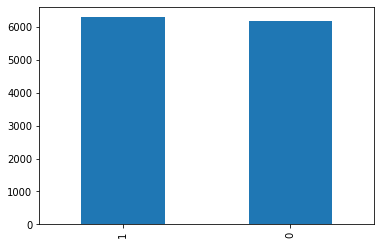

In [5]:
test_df['category'].value_counts().plot.bar()

In [6]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)